In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

from gen_chem_1D.gen_models.reinvent.tokenization import RegexTokenizer

In [2]:
df = pd.read_csv('data/esol.csv')
df

,SMILES,logSolubility
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,CC(C)=CCCC(C)=CC(=O),-2.060
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,c1ccsc1,-1.330
...,...,...
1123,FC(F)(F)C(Cl)Br,-1.710
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,CCSCCSP(=S)(OC)OC,-3.091
1126,CCC(C)C,-3.180


In [3]:
def get_num_mols(smi):
    smi_list = smi.split('.')
    return len(smi_list)

In [4]:
df['num_mols'] = df.SMILES.apply(get_num_mols)

In [5]:
def get_num_heavy_atoms(smi):
    mol = Chem.MolFromSmiles(smi)
    return mol.GetNumHeavyAtoms()

In [6]:
df['smi_len'] = df.SMILES.apply(len)

In [7]:
df['num_heavy_atoms'] = df.SMILES.apply(get_num_heavy_atoms)

In [8]:
def get_MW(smi):
    mol = Chem.MolFromSmiles(smi)
    return Descriptors.MolWt(mol)

In [9]:
df['molecular_weight'] = df.SMILES.apply(get_MW)

In [10]:
df.describe()

,logSolubility,num_mols,smi_len,num_heavy_atoms,molecular_weight
count,1128.000000,1128.0,1128.000000,1128.000000,1128.000000
mean,-3.050102,1.0,22.327128,13.289894,203.937074
std,2.096441,0.0,13.166206,6.878603,102.738077
min,-11.600000,1.0,1.000000,1.000000,16.043000
25%,-4.317500,1.0,12.000000,8.000000,121.183000
50%,-2.860000,1.0,20.000000,12.000000,182.179000
75%,-1.600000,1.0,31.000000,18.000000,270.372000
max,1.580000,1.0,97.000000,55.000000,780.949000


In [11]:
df.query('num_mols > 1')

,SMILES,logSolubility,num_mols,smi_len,num_heavy_atoms,molecular_weight


<Axes: ylabel='Frequency'>

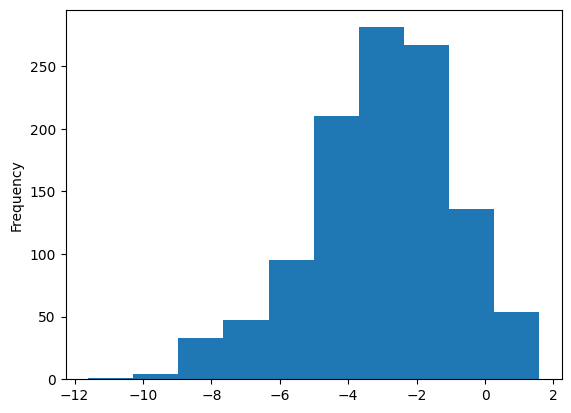

In [12]:
df.logSolubility.plot.hist()

O=C1CCCN1
num heavy atoms: 6
smiles length: 9
logSolubility: 1.07


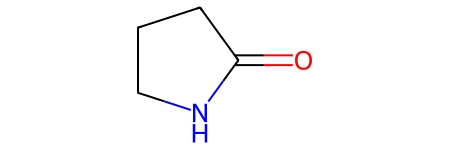

CO
num heavy atoms: 2
smiles length: 2
logSolubility: 1.57


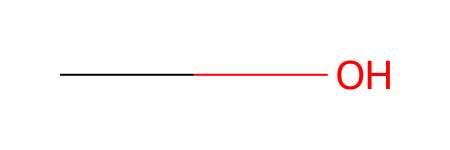

c1ccnnc1
num heavy atoms: 6
smiles length: 8
logSolubility: 1.1


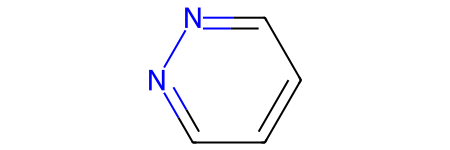

CNN
num heavy atoms: 3
smiles length: 3
logSolubility: 1.34


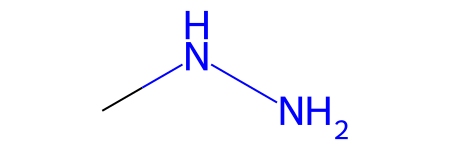

OCC(O)C(O)C(O)C(O)CO
num heavy atoms: 12
smiles length: 20
logSolubility: 1.09


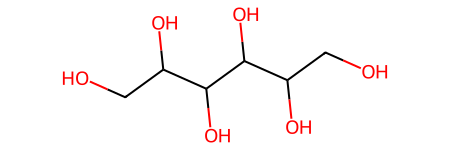

c1cncnc1
num heavy atoms: 6
smiles length: 8
logSolubility: 1.1


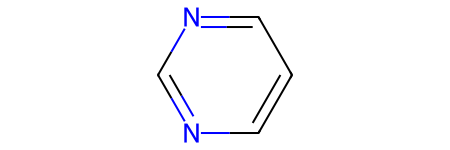

Oc1ccccn1
num heavy atoms: 7
smiles length: 9
logSolubility: 1.02


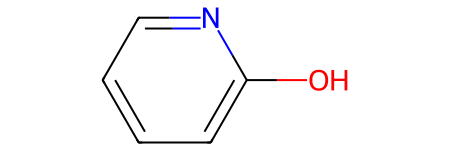

CC(=O)N
num heavy atoms: 4
smiles length: 7
logSolubility: 1.58


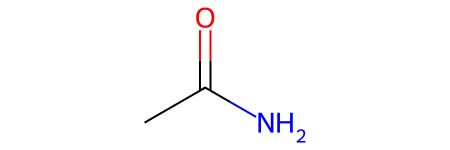

OCC(O)CO
num heavy atoms: 6
smiles length: 8
logSolubility: 1.12


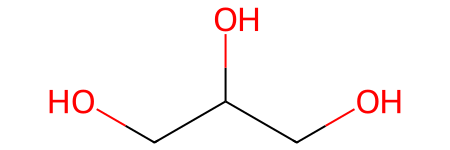

CN(C)C(=O)C
num heavy atoms: 6
smiles length: 11
logSolubility: 1.11


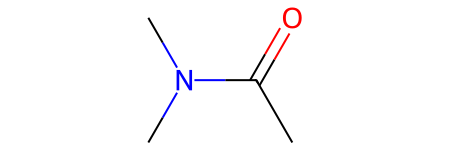

CCO
num heavy atoms: 3
smiles length: 3
logSolubility: 1.1


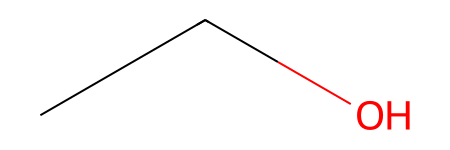

CNC(=O)C(C)SCCSP(=O)(OC)(OC)
num heavy atoms: 16
smiles length: 28
logSolubility: 1.144


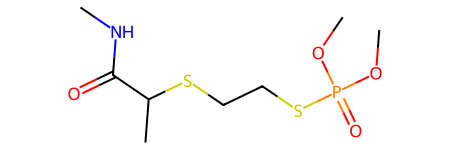

Oc1ccncc1
num heavy atoms: 7
smiles length: 9
logSolubility: 1.02


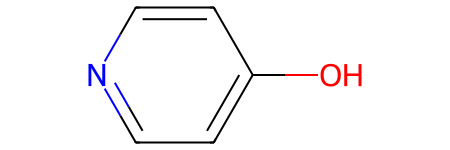

In [13]:
# visually inspect the highly soluble molecules
for i, row in df.query('logSolubility >= 1').iterrows():
    print(row.SMILES)
    print(f'num heavy atoms: {row.num_heavy_atoms}')
    print(f'smiles length: {row.smi_len}')
    print(f'logSolubility: {row.logSolubility}')
    mol = Chem.MolFromSmiles(row.SMILES)
    display(mol)

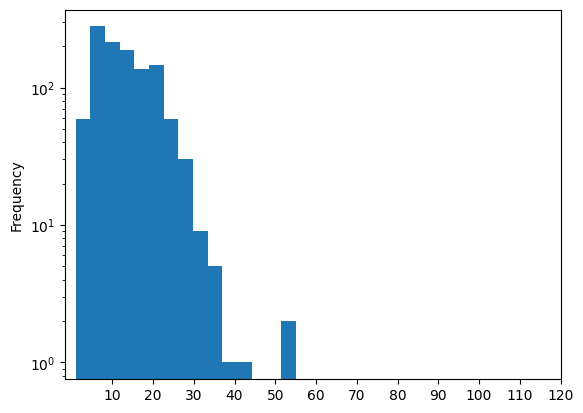

In [14]:
# so let's clean the molecules and only use 10 <= heavy atoms <= 70
ax = df.num_heavy_atoms.plot.hist(bins=15)
ax.set_yscale('log')
ax.set_xticks(np.arange(10, 130, 10));

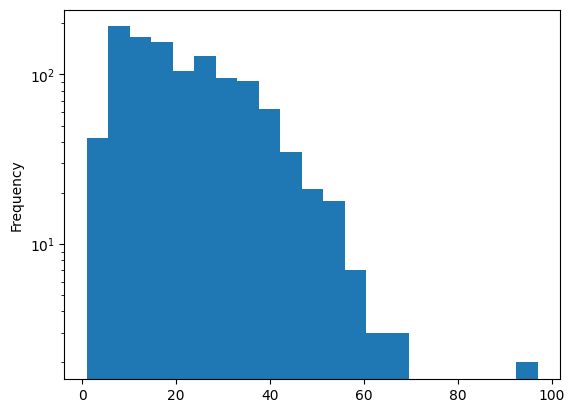

In [15]:
ax = df.smi_len.plot.hist(bins=21)
ax.set_yscale('log')

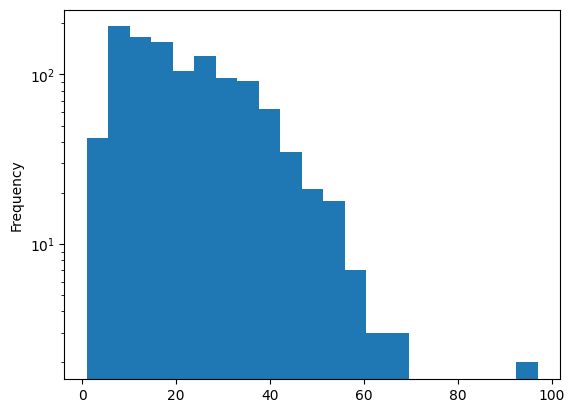

In [16]:
ax = df.query('num_heavy_atoms <= 70').smi_len.plot.hist(bins=21)
ax.set_yscale('log')

In [17]:
tokenizer = RegexTokenizer()

Even though the length of the SMILES string is relatively large (up to ~100), the number of tokens is still < 100. So we can set `max_length` to 100 when sampling from the model.

COc1cc(cc(OC)c1O)C6C2C(COC2=O)C(OC4OC3COC(C)OC3C(O)C4O)c7cc5OCOc5cc67
num heavy atoms: 42
smiles length: 69
num tokens: 69


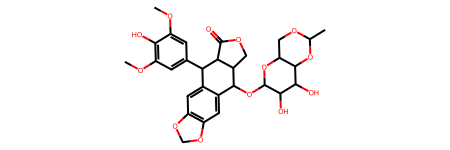

CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC3(C)C(CCC4C3CC(O)C5(C)C(CCC45O)C6=CC(=O)OC6)C7)OC8C
num heavy atoms: 55
smiles length: 97
num tokens: 97


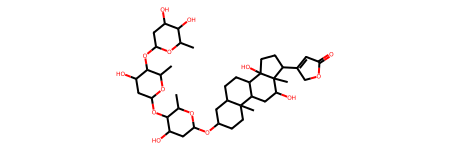

CC1OC(CC(O)C1O)OC2C(O)CC(OC2C)OC8C(O)CC(OC7CCC3(C)C(CCC4C3CCC5(C)C(CCC45O)C6=CC(=O)OC6)C7)OC8C
num heavy atoms: 54
smiles length: 94
num tokens: 94


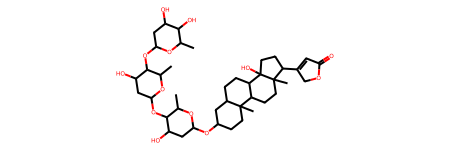

In [18]:
for i, row in df.query('num_heavy_atoms >= 40').iterrows():
    print(row.SMILES)
    print(f'num heavy atoms: {row.num_heavy_atoms}')
    print(f'smiles length: {row.smi_len}')
    num_tokens = len(tokenizer.tokenize(row.SMILES))
    print(f'num tokens: {num_tokens}')
    mol = Chem.MolFromSmiles(row.SMILES)
    display(mol)